<a href="https://colab.research.google.com/github/ravichas/AMPL-Tutorial/blob/master/explore_data_excape_2_curation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data curation of HTR3A protein data from ExCAPE-DB Data

The Target specific data was downloaded from https://zenodo.org/record/173258#.X_44kuhKi70

Please refer to the ExCAPE-DB publication (https://pubmed.ncbi.nlm.nih.gov/28316655/) for details about the database 




Here are some details about HTR3A gene (taken from RefSeq NCBI)
*The product of this gene belongs to the ligand-gated ion channel receptor superfamily. This gene encodes subunit A of the type 3 receptor for 5-hydroxytryptamine (serotonin), a biogenic hormone that functions as a neurotransmitter, a hormone, and a mitogen. This receptor causes fast, depolarizing responses in neurons after activation. It appears that the heteromeric combination of A and B subunits is necessary to provide the full functional features of this receptor, since either subunit alone results in receptors with very low conductance and response amplitude. Alternatively spliced transcript variants encoding different isoforms have been identified.*

Diseases associated with HTR3A include Irritable Bowel Syndrome and Motion Sickness.

## Basic information about HTR3A gene:

**Present in** Chromosome 11
**Exon count:** 10

mRNA and protein information

*   NM_000869.6 → NP_000860.3 
*   NM_001161772.3 → NP_001155244.1
*   NM_213621.4 → NP_998786.3 

# Before you begin, make sure you close all other COLAB notebooks. 

# Change Runtime settings

## Plesae change your runtime settings to use GPU and high-memory, if you have 

## Runtime --> Change Runtime Type --> GPU wityh high-RAM

In [ ]:
!date # starting time 

Mon Jan 18 02:52:31 UTC 2021


## Install AMPL GPU version. 

```
real	2m59.739s
user	1m48.995s
sys	0m20.614s
```

In [ ]:
import requests

# Copy AMPL install script
url='https://raw.githubusercontent.com/ravichas/AMPL-Tutorial/master/config/install_AMPL_GPU.sh'

downloaded_obj = requests.get(url)
with open("install_AMPL_GPU.sh", "wb") as file:
    file.write(downloaded_obj.content)


# Install and load AMPL
!chmod u+x install_AMPL_GPU.sh
!time ./install_AMPL_GPU.sh
import sys
if '/content/AMPL/lib/python3.6/site-packages' not in sys.path:
    sys.path.insert(1, '/content/AMPL/lib/python3.6/site-packages')

--2021-01-18 02:52:31--  https://repo.anaconda.com/miniconda/Miniconda3-latest-Linux-x86_64.sh
Resolving repo.anaconda.com (repo.anaconda.com)... 104.16.130.3, 104.16.131.3, 2606:4700::6810:8203, ...
Connecting to repo.anaconda.com (repo.anaconda.com)|104.16.130.3|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 94235922 (90M) [application/x-sh]
Saving to: ‘Miniconda3-latest-Linux-x86_64.sh’

Miniconda3-latest-L 100%[===================>]  89.87M   236MB/s    in 0.4s    

2021-01-18 02:52:32 (236 MB/s) - ‘Miniconda3-latest-Linux-x86_64.sh’ saved [94235922/94235922]

PREFIX=/content/AMPL
Unpacking payload ...
Solving environment: - \ done

## Package Plan ##

  environment location: /content/AMPL

  added / updated specs:
    - _libgcc_mutex==0.1=main
    - brotlipy==0.7.0=py38h27cfd23_1003
    - ca-certificates==2020.10.14=0
    - certifi==2020.6.20=pyhd3eb1b0_3
    - cffi==1.14.3=py38h261ae71_2
    - chardet==3.0.4=py38h06a4308_1003
    - conda-package-han

## Exploring target activity data from selected database
## Data source = ExcapeDB
## Target activity = HTR3A

In [ ]:
# There is a problem with the previously imported cffi, so delete it and 
# load it with AMPL instead
if 'cffi' in sys.modules:
  del sys.modules['cffi']

In [ ]:
# We temporarily disable warnings for demonstration.
# FutureWarnings and DeprecationWarnings are present from some of the AMPL 
# dependency modules.
import warnings
warnings.filterwarnings('ignore')

import json
import numpy as np
import pandas as pd
import os
import requests
import sys

In [ ]:
#
# Import AMPL libraries
# 
import atomsci.ddm.utils.data_curation_functions as dcf
import atomsci.ddm.utils.curate_data as curate_data
import atomsci.ddm.pipeline.diversity_plots as dp
import atomsci.ddm.pipeline.chem_diversity as cd
# Additional python libraries
import pandas as pd
import numpy as np
import getpass,os

/content/AMPL/lib/python3.6/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


# Select a target to work with 
# (e.g. PDE2A, KCNH2, SCNA5)

In [ ]:
target_name='HTR3A'
# username='ravi'
ofile=target_name+'_excape_curated.csv'

In [ ]:
import io
url = 'https://raw.githubusercontent.com/ravichas/AMPL-Tutorial/master/datasets/Excape_HTR3A.tsv'
download = requests.get(url).content

In [ ]:
# Reading the downloaded content and turning it into a pandas dataframe
data = pd.read_csv(io.StringIO(download.decode('utf-8')), sep='\t', header=0 )

# define data locations 
<!-- ## get username to use as a unique identifier to work in shared directories -->

## Load previously saved raw data

In [ ]:
data.head()

,Ambit_InchiKey,Original_Entry_ID,Entrez_ID,Activity_Flag,pXC50,DB,Original_Assay_ID,Tax_ID,Gene_Symbol,Ortholog_Group,InChI,SMILES
0,AATPYXMXFBBKFO-KARVIEMNNA-N,CHEMBL526307,3359,N,1.00000,chembl20,565951,9606,HTR3A,2102,InChI=1/C14H17IN4O2/c1-7(2)8-4-11(20-3)9(15)5-...,C=1C(=C(OC2=CN=C(N=C2N)N)C=C(C1OC)I)C(C)C
1,ABIDZKZAFOTHFB-CCUGXXBONA-N,CHEMBL1271790,3359,A,8.17000,chembl20,674333,9606,HTR3A,2102,InChI=1/C21H28N4O3/c1-13-11-27-12-14(2)25(13)2...,C1C2CCN(C1)C[C@H]2NC(C3=C4N=C(OC4=CC=C3)N5[C@H...
2,ABSDJNLAUZQHJY-UHFFFAOYNA-N,CHEMBL2205048,3359,A,7.21000,chembl20,880265,9606,HTR3A,2102,InChI=1/C17H20N2OS/c1-20-14-5-4-6-15(13-14)21-...,N1(CCNCC1)C=2C(=CC=CC2)SC=3C=C(C=CC3)OC
3,ACKJXXOVSOCBPX-PHLAQJRANA-N,11376655,79246,A,8.25181,pubchem,652569,10116,HTR3A,2102,InChI=1/C36H46N6O/c1-26-33(27-14-6-9-17-30(27)...,O=C(NCCCCCCCNC=1C=2CCCCC2N=C3C1C=CC=C3)C4=C(C(...
4,ACKJXXOVSOCBPX-PHLAQJRANA-N,CHEMBL195241,3359,A,8.25000,chembl20,462123,9606,HTR3A,2102,InChI=1/C36H46N6O/c1-26-33(27-14-6-9-17-30(27)...,C=1(N=C2C=CC=CC2=C(C1C)C(=O)NCCCCCCCNC=3C4=C(C...


In [ ]:
data.rename( columns={ "pXC50" : "PXC50", "Ambit_InchiKey" : "compound_id" }, inplace=True)
data.head()

,compound_id,Original_Entry_ID,Entrez_ID,Activity_Flag,PXC50,DB,Original_Assay_ID,Tax_ID,Gene_Symbol,Ortholog_Group,InChI,SMILES
0,AATPYXMXFBBKFO-KARVIEMNNA-N,CHEMBL526307,3359,N,1.00000,chembl20,565951,9606,HTR3A,2102,InChI=1/C14H17IN4O2/c1-7(2)8-4-11(20-3)9(15)5-...,C=1C(=C(OC2=CN=C(N=C2N)N)C=C(C1OC)I)C(C)C
1,ABIDZKZAFOTHFB-CCUGXXBONA-N,CHEMBL1271790,3359,A,8.17000,chembl20,674333,9606,HTR3A,2102,InChI=1/C21H28N4O3/c1-13-11-27-12-14(2)25(13)2...,C1C2CCN(C1)C[C@H]2NC(C3=C4N=C(OC4=CC=C3)N5[C@H...
2,ABSDJNLAUZQHJY-UHFFFAOYNA-N,CHEMBL2205048,3359,A,7.21000,chembl20,880265,9606,HTR3A,2102,InChI=1/C17H20N2OS/c1-20-14-5-4-6-15(13-14)21-...,N1(CCNCC1)C=2C(=CC=CC2)SC=3C=C(C=CC3)OC
3,ACKJXXOVSOCBPX-PHLAQJRANA-N,11376655,79246,A,8.25181,pubchem,652569,10116,HTR3A,2102,InChI=1/C36H46N6O/c1-26-33(27-14-6-9-17-30(27)...,O=C(NCCCCCCCNC=1C=2CCCCC2N=C3C1C=CC=C3)C4=C(C(...
4,ACKJXXOVSOCBPX-PHLAQJRANA-N,CHEMBL195241,3359,A,8.25000,chembl20,462123,9606,HTR3A,2102,InChI=1/C36H46N6O/c1-26-33(27-14-6-9-17-30(27)...,C=1(N=C2C=CC=CC2=C(C1C)C(=O)NCCCCCCCNC=3C4=C(C...


In [ ]:
# import os
# working_dir=tmp_dir
curated_file=ofile

In [ ]:
data['SMILES']

0              C=1C(=C(OC2=CN=C(N=C2N)N)C=C(C1OC)I)C(C)C
1      C1C2CCN(C1)C[C@H]2NC(C3=C4N=C(OC4=CC=C3)N5[C@H...
2                N1(CCNCC1)C=2C(=CC=CC2)SC=3C=C(C=CC3)OC
3      O=C(NCCCCCCCNC=1C=2CCCCC2N=C3C1C=CC=C3)C4=C(C(...
4      C=1(N=C2C=CC=CC2=C(C1C)C(=O)NCCCCCCCNC=3C4=C(C...
                             ...                        
644    [C@@H]12N([C@@H](C[C@H](C1)NC(C3=C4C(OC(=N4)N5...
645    N=1C(N(C(C2CC(CCC12)C)=O)N)=CCCCN3CCN(CC3)C=4N...
646    O=C(NC1C[C@@H]2N([C@H](C1)CCC2)C)C3=C4OC(=NC4=...
647    [C@@H]12N([C@@H](C[C@H](C1)NC(C3=C4C(N=C(O4)C=...
648    N=1C(N(C(C2CCCCC12)=O)N)=CCCCN3CCN(CC3)C=4N=C5...
Name: SMILES, Length: 649, dtype: object

In [ ]:
# Generate SMILES, InChI keys for dataset with curation and structure modules.
# RDkit modules are used to process the SMILES strings
data['rdkit_smiles'] = data['SMILES'].apply(curate_data.base_smiles_from_smiles)
# data['inchi_key'] = data['smiles'].apply(struct_utils.smiles_to_inchi_key)

In [ ]:
print(data.shape)
print(data['rdkit_smiles'].value_counts()[0:10])

(649, 13)
NCCc1c[nH]c2ccc(O)cc12                                  3
Cn1ncc(-c2ccc(OCCCN3CCCCC3)cc2)cc1=O                    2
Cc1cccnc1-n1nc(C)c(-c2ccc(OCCCN3CCC[C@H]3C)cc2)cc1=O    2
O=C1c2cc(Cl)cc3cnn(c23)CCN1[C@@H]1CN2CCC1CC2            2
c1ccc2nc(N3CCNCC3)ccc2c1                                2
C[C@@H]1CCCN1CCCOc1ccc(-c2cnnc(O)c2)cc1                 2
Clc1cnc2nc(N3CCN4CCC3CC4)oc2c1                          2
CN1CCN(C2=Nc3cc(Cl)ccc3Nc3ccccc32)CC1                   2
C[C@@H]1CCCN1CCCOc1ccc(-c2ccc(O)nn2)cc1                 2
O=C(Oc1ccccc1)N1CCN2CCC1CC2                             2
Name: rdkit_smiles, dtype: int64


In [ ]:
# import os
# working_dir=tmp_dir
# ofile=target_name+'_excape_curated.csv.'+username

# column: Response values column
column = 'PXC50'

# tolerance: Percentage of individual respsonse values allowed to different from 
# the average to be included in averaging
tolerance = 10

# list_bad_duplicates: Print structures with bad duplicates
list_bad_duplicates = 'Yes'

# max_std: Maximum allowed standard deviation for computed average response value
# NOTE: In this example, we set this value very high to disable this feature
max_std = 1

# compound_id: Compound ID column
compound_id = 'compound_id'

# smiles_col: SMILES column
smiles_col = 'rdkit_smiles'

# column that will be averaged ; smiles_col; used to find the replicates
# 

curated_df = curate_data.average_and_remove_duplicates(column, tolerance, 
                                                       list_bad_duplicates, 
                                                       data, max_std, 
                                                       compound_id=compound_id, 
                                                       smiles_col=smiles_col)
# curated_file = os.path.join(working_dir, ofile)
## discard out of range values
curated_df=curated_df[curated_df['VALUE_NUM_mean']>2]
curated_df.to_csv(curated_file, index=False)

Bad duplicates removed from dataset
Dataframe size (643, 17)
List of 'bad' duplicates removed
                     compound_id    PXC50  ...   Perc_Var  VALUE_NUM_std
36   BSNKYWSMUAGMDO-UHFFFAOYNA-N  6.57025  ...  11.638406       1.223846
37   BSNKYWSMUAGMDO-UHFFFAOYNA-N  8.30103  ...  11.638406       1.223846
227  JBVRKZZSTULWTO-OAHLLOKONA-N  9.30103  ...  15.893248       1.803851
228  JBVRKZZSTULWTO-OAHLLOKONA-N  6.75000  ...  15.893248       1.803851
548  WLINCFBAKQHMPZ-OAHLLOKONA-N  8.19382  ...   9.661653       1.020935
549  WLINCFBAKQHMPZ-OAHLLOKONA-N  6.75000  ...   9.661653       1.020935

[6 rows x 5 columns]

Dataset de-duplicated
Dataframe size (602, 17)
New column created with averaged values:  VALUE_NUM_mean


## Note this includes the compounds discarded by measurement variation and out of range values

In [ ]:
curated_df['Remove_BadDuplicate'].value_counts()

0    596
Name: Remove_BadDuplicate, dtype: int64

In [ ]:
compound_id='rdkit_smiles'
reject=data[~data[compound_id].isin(curated_df[compound_id])]
reject

,compound_id,Original_Entry_ID,Entrez_ID,Activity_Flag,PXC50,DB,Original_Assay_ID,Tax_ID,Gene_Symbol,Ortholog_Group,InChI,SMILES,rdkit_smiles
0,AATPYXMXFBBKFO-KARVIEMNNA-N,CHEMBL526307,3359,N,1.00000,chembl20,565951,9606,HTR3A,2102,InChI=1/C14H17IN4O2/c1-7(2)8-4-11(20-3)9(15)5-...,C=1C(=C(OC2=CN=C(N=C2N)N)C=C(C1OC)I)C(C)C,COc1cc(C(C)C)c(Oc2cnc(N)nc2N)cc1I
36,BSNKYWSMUAGMDO-UHFFFAOYNA-N,11184481,15561,A,6.57025,pubchem,460741,10090,HTR3A,2102,InChI=1/C14H18N4O/c1-10-2-3-12-13(15-10)16-14(...,O1C(N2C3CCN(CC3)CC2)=NC=4N=C(C=CC14)C,Cc1ccc2oc(N3CCN4CCC3CC4)nc2n1
37,BSNKYWSMUAGMDO-UHFFFAOYNA-N,11184481,3359,A,8.30103,pubchem,460743,9606,HTR3A,2102,InChI=1/C14H18N4O/c1-10-2-3-12-13(15-10)16-14(...,O1C(N2C3CCN(CC3)CC2)=NC=4N=C(C=CC14)C,Cc1ccc2oc(N3CCN4CCC3CC4)nc2n1
169,GVOCXQUIZNWEMU-YAQRNVERNA-N,14712103,3359,N,NaN,pubchem,616534,9606,HTR3A,2102,InChI=1/C12H15N3/c1-2-4-11(5-3-1)8-13-7-6-12-9...,N(CCC=1NC=NC1)CC2=CC=CC=C2,c1ccc(CNCCc2cnc[nH]2)cc1
227,JBVRKZZSTULWTO-OAHLLOKONA-N,69937162,3359,A,9.30103,pubchem,1141224,9606,HTR3A,2102,InChI=1/C17H19ClN4O/c18-13-7-12-9-19-22-6-5-21...,ClC=1C=C2C(=O)N([C@H]3C4CCN(C3)CC4)CCN5N=CC(=C...,O=C1c2cc(Cl)cc3cnn(c23)CCN1[C@@H]1CN2CCC1CC2
228,JBVRKZZSTULWTO-OAHLLOKONA-N,CHEMBL3261483,15561,A,6.75000,chembl20,1350972,10090,HTR3A,2102,InChI=1/C17H19ClN4O/c18-13-7-12-9-19-22-6-5-21...,C1=C(C=C2C=3N(N=C2)CCN(C(C13)=O)[C@H]4C5CCN(C4...,O=C1c2cc(Cl)cc3cnn(c23)CCN1[C@@H]1CN2CCC1CC2
321,NECSKBYJMMVETP-UHFFFAOYNA-N,CHEMBL3233402,3359,N,1.29000,chembl20,1337830,9606,HTR3A,2102,InChI=1/C31H36N4O2/c1-32-29(36)31(26-14-6-2-7-...,C1(C(N(C(N1CCCCCN2CCN(CC2)C3=CC=CC=C3)=O)C)=O)...,CN1C(=O)N(CCCCCN2CCN(c3ccccc3)CC2)C(c2ccccc2)(...
331,NRJJRVIMKKANAW-UHFFFAOYNA-N,1408942,3359,N,NaN,pubchem,616534,9606,HTR3A,2102,InChI=1/C15H18N4/c1-18-7-9-19(10-8-18)15-11-14...,N1(CCN(CC1)C)C=2N=CN=C(C2)C3=CC=CC=C3,CN1CCN(c2cc(-c3ccccc3)ncn2)CC1
344,OGPREQIZGSIMHW-JLGFQASFNA-N,71459241,3359,N,NaN,pubchem,709378,9606,HTR3A,2102,"InChI=1/C16H28N4O/c1-16(2,3)13-12-14(19-18-13)...",O=C(NC1=NNC(C(C)(C)C)=C1)CCCN2CCCCC2,CC(C)(C)c1cc(NC(=O)CCCN2CCCCC2)n[nH]1
526,VJEBGMIAGKMECI-FNGIMCLKNA-N,76316933,3359,N,NaN,pubchem,643471,9606,HTR3A,2102,InChI=1/C27H32N8O4/c1-33-18-7-6-8-19(33)16-17(...,O=C(NC1C[C@H]2N([C@@H](C1)CCC2)C)C3=NN(C4=C3C=...,CN1[C@H]2CCC[C@@H]1CC(NC(=O)c1nn(CCCCNc3ccc([N...


## save rejected molecules for further examination

In [ ]:
print("Number of discarded compounds",reject[compound_id].nunique())
# ofile=tmp_dir+target_name+'.reject_check.'+username
ofile=target_name+'.reject_check.csv'
reject.to_csv(ofile,index=False)

Number of discarded compounds 9


(0.0, 12.0)

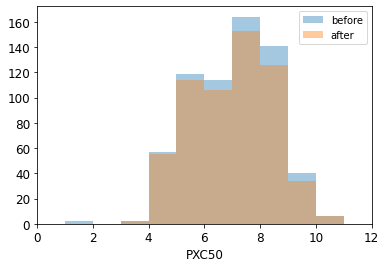

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
fig, ax = plt.subplots()

# This will be our before curation
before=data["PXC50"]

# current curated dataframe will not include any out of range values
after=curated_df["PXC50"]

sns.distplot(before, bins=range(0, 12, 1), ax=ax, kde=False, label='before')
sns.distplot(after, bins=range(0, 12, 1), ax=ax, kde=False, label='after')
plt.legend()
ax.set_xlim([0, 12])

Post-processing dataset

Total Number of results = 596
dataset mean = 6.9555837080536875 NM
dataset stdev = 1.4751039669352373 NM
dataset max = 10.5 NM
dataset min = 3.06 NM



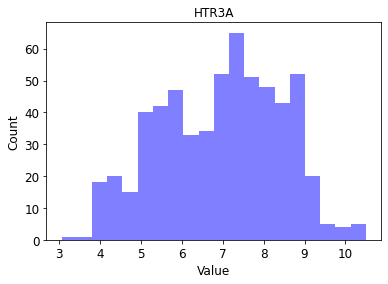

In [ ]:
column = 'PXC50'
num_bins = 20
title = target_name
units = 'NM'
filepath = ""
data=curated_df

curate_data.summarize_data(column, num_bins, title, units, filepath, data)

In [ ]:
!date #ending time

Mon Jan 18 02:55:06 UTC 2021
